# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


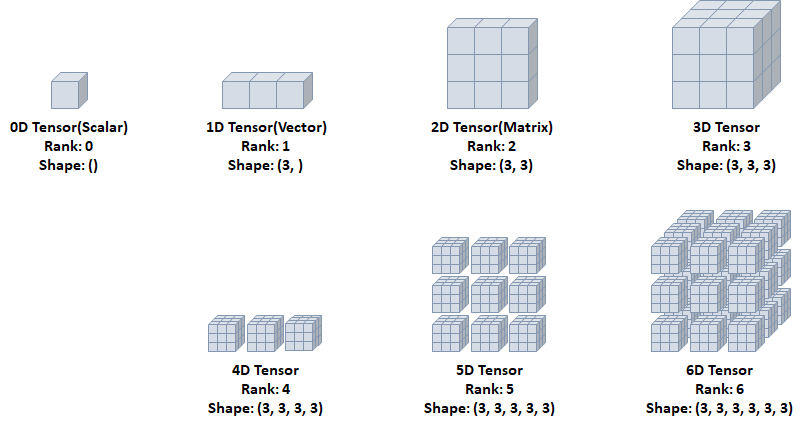

In [10]:
import torch
torch.__version__

'1.10.0+cu111'

In [ ]:
# 텐서 초기화와 데이터 타입
x = torch.empty(4,2) # 메모리에 남아있는것이 나옴
x

tensor([[-9.0779e-23,  3.0681e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  6.4460e-44],
        [ 1.1578e+27,  1.1362e+30]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2) # 0에서 1사이의 랜덤 숫자
x

tensor([[0.6030, 0.4800],
        [0.3317, 0.2759],
        [0.6686, 0.6457],
        [0.5341, 0.3446]])

In [ ]:
# 데이터 타입이 long이고 0으로 채워진 텐서
x = torch.zeros(4, 2, dtype= torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [ ]:
# 2 x 4 크기, double 자료형으로, 1로 채워진 텐서
# 사이즈에 따라서 float형을 좀 더 디테일하게 나눠줌
x = x.new_ones(2,4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.3783,  0.6589,  0.4256,  0.0990],
        [ 1.9547, -0.9209,  1.9351,  0.6392]])


In [ ]:
# 텐서의 크기 계산
x.size()

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


A signed integer is a 32-bit datum that encodes an integer in the range [-2147483648 to 2147483647]

unsigned int는 양수만 저장한다. 때문에 부호에 비트를 사용하지 않아 저장 가능한 양수의 범위를 두 배로 늘인다. signed int보다 더 넓은 범위의 양수(0~4,294,967,295)를 표현할 수 있지만 실제 표현 가능한 개수는 음수를 포함한 signed int와 동일하다.

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [4]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 어떻한 장치(cpu, gpu)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.1361])
-1.1360726356506348
torch.float32


In [6]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cpu


In [10]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

tensor([1.])
tensor([-1.1361])
tensor([-0.1361])
tensor([-0.1361], dtype=torch.float64)


In [ ]:
# 다차원 텐서 표현

# 0D Tensor(Scalar)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [ ]:
# 1D Tensor(Vector)
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


In [ ]:
# 2D Tensor(Matrix)
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3, 4, 5차원 텐서를 생성하여 출력하세요.

In [ ]:
# 텐서의 연산
# randn 표준정규분포 평균이 0, 표준편차 1
import math
a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a)) # input각 요소보다 크거나 같은 가장 작은 정수의 요소가 있는 새 텐서를 반환
print(torch.floor(a)) # input각 요소보다 작거나 같은 가장 큰 정수의 요소의 바닥을 가진 새 텐서를 반환
print(torch.clamp(a, -0.5,0.5)) # input범위 [ min ,  max] 에 있는 모든 요소를 ​​고정

tensor([[-0.5011, -2.1351]])
tensor([[0.5011, 2.1351]])
tensor([[-0., -2.]])
tensor([[-1., -3.]])
tensor([[-0.5000, -0.5000]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) # input텐서 에 있는 모든 요소의 곱을 반환
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[-0.5011, -2.1351]])
tensor(-2.1351)
tensor(-0.5011)
tensor(-1.3181)
tensor(1.1554)
tensor(1.0700)
tensor([1, 2, 3])


[과제] 2차원 텐서 x,y를 생성하여 덧셈(add), 뺄셈(sub), 곱셈(mul), 나눗셈(div), 내적(matmul, mm) 연산 사례를 pytorch로 1개 이상씩 수행하세요.

In [11]:
# Manipulations
# indexing : numpy처럼 indexing 형태로 사용 가능

import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0]) # 0행 0열
print(x[:,0]) # 0열
print(x[0,:]) # 0행

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor([1., 3.])
tensor([1., 2.])


In [12]:
# view : 텐서의 크기(size)나 모양(shape)을 변경
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [18]:
print(x, '\n')
y = x.view(20)
print(y)
print(x.ndim) # 2차원
print(y.ndim) # 1차원으로 변경 

tensor([[ 0.0388,  0.3577,  0.6565, -1.4922, -0.1387],
        [ 0.7764,  0.2831,  0.7263, -1.8444, -1.3759],
        [-1.0474, -1.4350, -0.0335, -0.6743,  1.0174],
        [-0.0945, -0.1260,  0.6495,  0.1259, -0.0799]]) 

tensor([ 0.0388,  0.3577,  0.6565, -1.4922, -0.1387,  0.7764,  0.2831,  0.7263,
        -1.8444, -1.3759, -1.0474, -1.4350, -0.0335, -0.6743,  1.0174, -0.0945,
        -0.1260,  0.6495,  0.1259, -0.0799])
2
1


In [19]:
z = x.view(5, -1)
z 

tensor([[ 0.0388,  0.3577,  0.6565, -1.4922],
        [-0.1387,  0.7764,  0.2831,  0.7263],
        [-1.8444, -1.3759, -1.0474, -1.4350],
        [-0.0335, -0.6743,  1.0174, -0.0945],
        [-0.1260,  0.6495,  0.1259, -0.0799]])

In [2]:
import torch
x= torch.FloatTensor([
                      [1,2],
                      [3,4],
                      [5,6],
                      [7,8]])

print(x)

#size 를 활용한 텐서 사이즈 보기
print(x.size())

#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)

# dim을 활용한 텐서 차원확인
print(x.dim)

#0차원 사이즈 확인
print(x.size(0))

#1차원 사이즈 확인
print(x.shape[1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
<built-in method dim of Tensor object at 0x7f5eee79bad0>
4
2


In [20]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([2.1725])
2.172459840774536
torch.float32


In [23]:
# 스칼라값 하나만 존재해 item()사용 가능
# tensor에 하나의 값만 존재한다면, .item() 을 사용하여 python scalar 값을 얻을 수 있다.
# tensor에 하나의 값이 아니라 여러개가 존재한다면 사용이 불가능하다.

x = torch.randn(2)
print(x)
print(x.item())

tensor([ 0.6261, -0.9189])


ValueError: ignored

In [24]:
print(x.dtype)

torch.float32


In [31]:
# squeeze : 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)
print(tensor.ndim)

tensor([[[0.6103, 0.5033, 0.4019],
         [0.9115, 0.7963, 0.9158],
         [0.0186, 0.6173, 0.7828]]])
torch.Size([1, 3, 3])
3


In [33]:
t = tensor.squeeze()
print(t)
print(t.shape)
print(t.ndim)

tensor([[0.6103, 0.5033, 0.4019],
        [0.9115, 0.7963, 0.9158],
        [0.0186, 0.6173, 0.7828]])
torch.Size([3, 3])
2


In [35]:
# unsqueeze : 차원을 증가
t = torch.rand(3,3)
print(t)
print(t.shape)
print(t.ndim)

tensor([[0.7085, 0.7429, 0.6378],
        [0.8477, 0.3957, 0.2088],
        [0.6842, 0.5466, 0.3449]])
torch.Size([3, 3])
2


In [37]:
tensor = t.unsqueeze(dim = 0)
print(tensor)
print(tensor.shape)
print(tensor.ndim)

tensor([[[0.7085, 0.7429, 0.6378],
         [0.8477, 0.3957, 0.2088],
         [0.6842, 0.5466, 0.3449]]])
torch.Size([1, 3, 3])
3


In [39]:
tensor = t.unsqueeze(dim = 2)
print(tensor)
print(tensor.shape)
print(tensor.ndim)

tensor([[[0.7085],
         [0.7429],
         [0.6378]],

        [[0.8477],
         [0.3957],
         [0.2088]],

        [[0.6842],
         [0.5466],
         [0.3449]]])
torch.Size([3, 3, 1])
3


In [40]:
tensor = t.unsqueeze(dim = 1)
print(tensor)
print(tensor.shape)
print(tensor.ndim)

tensor([[[0.7085, 0.7429, 0.6378]],

        [[0.8477, 0.3957, 0.2088]],

        [[0.6842, 0.5466, 0.3449]]])
torch.Size([3, 1, 3])
3


In [7]:
# stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서틑 결합하는 메소드(concatenate)
- stack과 유사하지만 쌓을 dim이 존재해야 한다.
- 해당 차원을 늘려준 후 결합한다.

In [41]:
a = torch.randn(1,3,3)
print(a,'\n')
b = torch.randn(1,3,3)
print(b,'\n')
c = torch.cat((a,b), dim=0) # 0차원 결합
print(c,'\n')
print(c.size())

tensor([[[-0.4061, -1.2319, -1.1330],
         [ 1.5491,  0.3177, -0.2031],
         [-1.6053, -1.0300,  1.3483]]]) 

tensor([[[-0.6987, -1.2623, -1.5752],
         [ 0.8303,  0.4945, -0.2253],
         [ 0.5882,  0.6386,  0.9556]]]) 

tensor([[[-0.4061, -1.2319, -1.1330],
         [ 1.5491,  0.3177, -0.2031],
         [-1.6053, -1.0300,  1.3483]],

        [[-0.6987, -1.2623, -1.5752],
         [ 0.8303,  0.4945, -0.2253],
         [ 0.5882,  0.6386,  0.9556]]]) 

torch.Size([2, 3, 3])


In [10]:
c = torch.cat((a,b), dim=1) 
print(c)
print(c.size())

tensor([[[-1.7301,  0.2221,  1.3914],
         [-0.4451,  0.2190,  0.1122],
         [-0.7593, -0.3843,  1.2899],
         [ 0.4477, -0.0168, -1.2377],
         [-0.5692,  0.9778,  1.1683],
         [ 1.6223,  0.6346,  0.9060]]])
torch.Size([1, 6, 3])


In [11]:
c = torch.cat((a,b), dim=2) 
print(c)
print(c.size())

tensor([[[-1.7301,  0.2221,  1.3914,  0.4477, -0.0168, -1.2377],
         [-0.4451,  0.2190,  0.1122, -0.5692,  0.9778,  1.1683],
         [-0.7593, -0.3843,  1.2899,  1.6223,  0.6346,  0.9060]]])
torch.Size([1, 3, 6])


## chunk와 split
- chunk의 경우 n개의 그룹을 만드는 것이고, split의 경우 n개의 데이터가 있는 그룹을 만드는 것이다.

- dim의 경우 0=1차원, 1=2차원, 2=3차원이다.

In [44]:
# chunk : 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)
tensor = torch.rand(3,6)
print(tensor,'\n')

#output = torch.chunk(input, n = (몇개로 쪼갤지 설정), dim = (어떤 차원에 적용할지))
t1,t2,t3 = torch.chunk(tensor, 3, dim=1) # 2차원으로 나눔
print(t1,'\n')
print(t2,'\n')
print(t3,'\n')
print(t1.ndim)

tensor([[0.3313, 0.5896, 0.5795, 0.8146, 0.5737, 0.9601],
        [0.6667, 0.3559, 0.1068, 0.1802, 0.5809, 0.8926],
        [0.2994, 0.7352, 0.5099, 0.6168, 0.9737, 0.7707]]) 

tensor([[0.3313, 0.5896],
        [0.6667, 0.3559],
        [0.2994, 0.7352]]) 

tensor([[0.5795, 0.8146],
        [0.1068, 0.1802],
        [0.5099, 0.6168]]) 

tensor([[0.5737, 0.9601],
        [0.5809, 0.8926],
        [0.9737, 0.7707]]) 

2


In [47]:
tensor = torch.rand(3,6)
print(tensor,'\n')

t1,t2,t3 = torch.chunk(tensor, 3, dim=0) # 1차원으로 나눔
print(t1,'\n')
print(t2,'\n')
print(t3,'\n')
print(t1.ndim)

tensor([[0.7089, 0.5980, 0.4956, 0.3041, 0.4565, 0.5338],
        [0.1115, 0.5287, 0.1190, 0.4332, 0.0022, 0.2575],
        [0.3713, 0.4297, 0.5982, 0.7751, 0.6426, 0.4207]]) 

tensor([[0.7089, 0.5980, 0.4956, 0.3041, 0.4565, 0.5338]]) 

tensor([[0.1115, 0.5287, 0.1190, 0.4332, 0.0022, 0.2575]]) 

tensor([[0.3713, 0.4297, 0.5982, 0.7751, 0.6426, 0.4207]]) 

2


In [49]:
# split : chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.split(tensor, 2, dim =1)
print(t1)
print(t2)
print(t3)

tensor([[0.2073, 0.8700, 0.9780, 0.5686, 0.7675, 0.4362],
        [0.4037, 0.2780, 0.3782, 0.8093, 0.7069, 0.2339],
        [0.0075, 0.5458, 0.8523, 0.9960, 0.8374, 0.0704]])
tensor([[0.2073, 0.8700],
        [0.4037, 0.2780],
        [0.0075, 0.5458]])
tensor([[0.9780, 0.5686],
        [0.3782, 0.8093],
        [0.8523, 0.9960]])
tensor([[0.7675, 0.4362],
        [0.7069, 0.2339],
        [0.8374, 0.0704]])


torch ↔️ numpy

- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - numpy()
  - from_numpy()
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [3]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [11]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [12]:
# a를 cpu로 보냄
print(a.to('cpu', torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [13]:
# b는 a를 numpy로 바꾼것
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [14]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [15]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b) # cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- grad가 붙은 함수는 대부분 gradient 계산에 사용한다고 보면 된다.
- pytorch에서는 신경망에서 역전파 단계의 연산을 자동화하는 자동미분 기능을 제공한다. 신경망의 순전파 단계를 지나 역전파 과정에서 autograd 기능을 이용하여 변화도(gradient)를 쉽게 계산할 수 있다.

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 
이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backpropagation`를 위해 미분값을 자동으로 계산
- https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

## require_grad
- requires_grad 속성을 True로 설정하면 역전파 중에 이 Tensor들에 대한 변화도를 계산하라는 의미
  -  해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
- 기록을 추적하는 것을 중단하게 하려면 .detach()를 호출하여 연산기록으로 부터 분리
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)


requiresgrad(...)는 기존 텐성의 requires_grad 값을 바꿔치기(in-place)하여 변경

변화도를 계산한다/ 하지 않는다는 의미는 무엇인가?

- Nueral Network의 학습 과정은 순전파 단계를 통해 Tensor 연산을 사용하여 답을 계산하고, 역전파 과정에서 정답과 예측값의 차인 loss를 통해 변화도를 계산하여 파라미터를 최적의 값으로 조정한다.

- 이때, 역전파 과정에서 각 노드의 변화도를 계산하는 것이 loss.backward()함수이다.

- 이 함수는 backpropagation을 수행하여 x.grad에 변화도를 저장한다. x.grad에 저장된 변화도를 이용하여 파라미터 값을 갱신한다.

- 변화도를 계산한다는 것은 곧 파라미터 값을 업데이트하겠다는 뜻이고, 변화도를 계산하지 않겠다는 것은 파라미터 값을 업데이트 하지 않겠다는 의미이다.

In [16]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙음
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.3800, 0.6190],
        [0.1558, 0.0131]])
tensor([[0.4556, 0.7545],
        [0.5920, 0.8090]])
tensor([[0.8356, 1.3735],
        [0.7477, 0.8221]])


In [17]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 1.2731,  0.5313,  2.5757],
        [ 0.8310, -3.6323,  1.2800],
        [-0.5639, -0.3367, -2.1123]])
False


In [20]:
a.requires_grad_(True) # _를 사용하면 inplace 연산. 
print(a.requires_grad)
b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(28.9532, grad_fn=<SumBackward0>)


In [2]:
# 기울기(Gradient)
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [3]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [4]:
z = y * y
out = z.mean()
print(z,out)  # z에 대해선 MulBackward가 나오고 out에 대해선 MeanBackward가 출력됨

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [5]:
print(out)
out.backward() # # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [6]:
# grad : data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않는다.

연산 기록을 멈추고( 메모리 사용을 줄이기), 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 된다.

이는 모델을 평가 할 때 도움된다. 왜냐하면 evaluation 단계에서는 gradient를 계산할 필요가 없기 때문이다. 

학습된 파라미터 값을 평가하는 단계이기 때문에 파라미터 값을 정하기 위해서 사용되는 gradient는 평가단계에서 더 이상 필요하지 않다.

기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용하다.


In [8]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [9]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


# 순전파(Feedforward)와 역전파(Backpropagation) 개념
다층 퍼셉트론(Multi-layer Perceptron, MLP)으로 학습 한다는 것은 최종 출력값과 실제값의 오차가 최소화 되도록 가중치와 바이어스를 계산하여 결정하는 것이다. 


순전파 (Feedforward) 알고리즘에서 발생한 오차를 줄이기 위해 새로운 가중치를 업데이트하고, 새로운 가중치로 다시 학습하는 과정을 역전파 (Backpropagation) 알고리즘 이라고 한다.


이러한 역전파 학습을 오차가 0에 가까워 질 때까지 반복한다. 역전파 알고리즘을 실행할때 가중치를 결정하는 방법에서는 경사하강법이 사용된다.

순전파 (Forword Propagation)

- Input에서부터 Output이 나올때까지 순서대로 계산을 하는 과정
- loss를 구하려면 실제값이랑 Output (H(x))의 차이를 알아야 한다.
- loss를 구할 수 있다
- 모델을 론칭을 하면 학습은 안하고 추론(예측)만 함 → 모델 추론


입력층에서 은닉층 방향으로 이동하면서 각 입력에 해당하는 가중치가 곱해지고, 결과적으로 가중치 합으로 계산되어 은닉층 뉴런의 함수 값(일반적으로 sigmoid 사용)이 입력된다. 그리고 최종 결과가 출력된다.

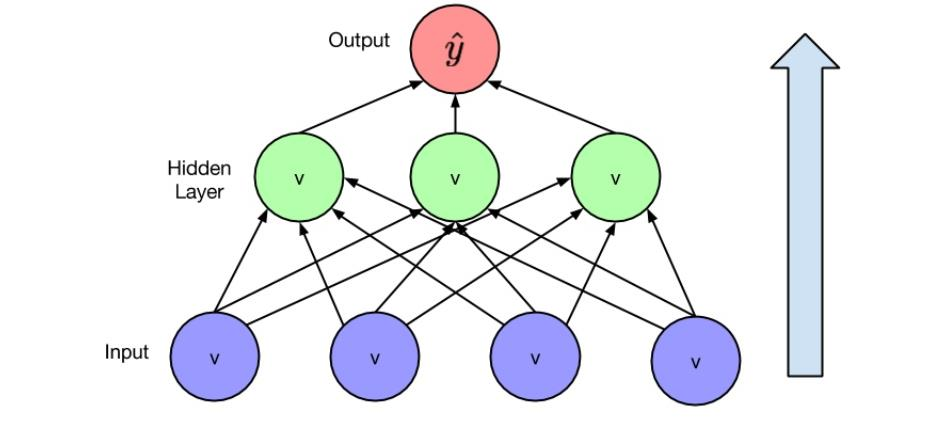

In [4]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/feedfoward propagation.png')

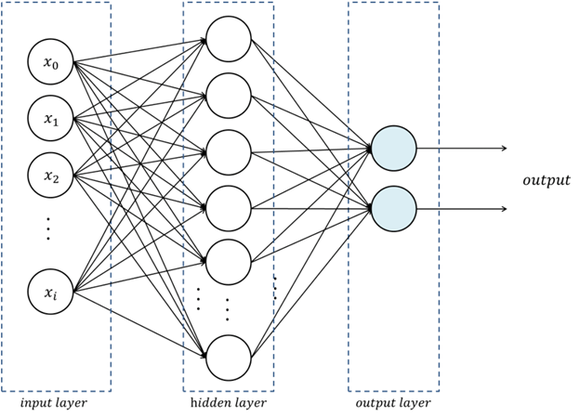

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/feedfoward.png')

역전파(Backpropagation)

- 딥러닝에서 제일 중요한 개념으로 학습하는 과정에서만 사용된다.
- 순전파와 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트 한다.

역전파 알고리즘은 input과 output 값을 알고 있는 상태에서 신경망을 학습 시키는 방법이다. 이 방법을 Supervised learning(지도학습)이라고 한다. 

초기 가중치, weight 값은 랜덤으로 주어지고 각각 노드들은 하나의 퍼셉트론으로, 노드를 지날때 마다 활성화함수를 적용한다.

## 왜 반대 학습 하는가?

- 학습을 할 때 가중치를 업데이트를 하는데 만약 순전파라면 Input에서 wieght를 바꾸고 바꾼 wieght를 Hidden Layer에서 또 바꾸고 Output에서 또 바꾸는데 그러면 Output에서 loss 차이가 너무 많이 날 수 있다.
  - loss를 Output에서 구하는데 Input에서부터 바꾸게 되면 Hidden Layer에서 가중치를 업데이트하기 위해서는 옵티마이저를 학습하는 과정에서 미분이 있는데 그 다음층 (Output)에 미분결과가 필요한데 그 다음층 미분 결과를 알 수가 없기 때문에 순방향으로는 가중치 업데이트를 못한다.
    - 이 문제를 해결하기 위해 위에서부터 가중치를 미분을 해서 업데이트한 후 그 값이 그대로 내려가서 또 업데이트 하고 업데이트 하면서 가중치를 반대방향으로 업데이트를 하는 아이디어를 고안해내서 역전파가 생기게 되었다.

역전파 알고리즘을 사용하여 층이 아 무리 깊어져도 학습을 할 수 있다.

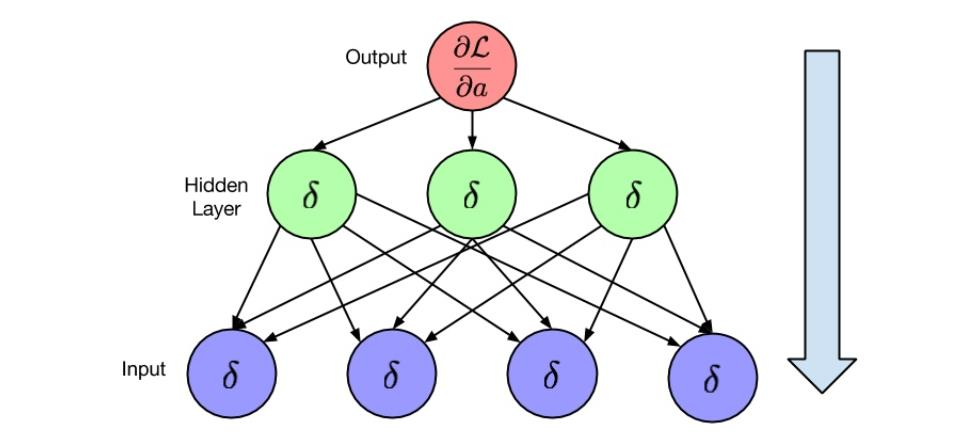

In [7]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/Back Propagation.png')

Gradient Descent를 활용하여 학습을 할 경우, 다음 층의 미분값이 필요하게 되는데, 현재 층에 연산이 끝나지 않아서 다음 층의 미분 값을 알 수가 없는 문제를 해결하기 위해 나옴

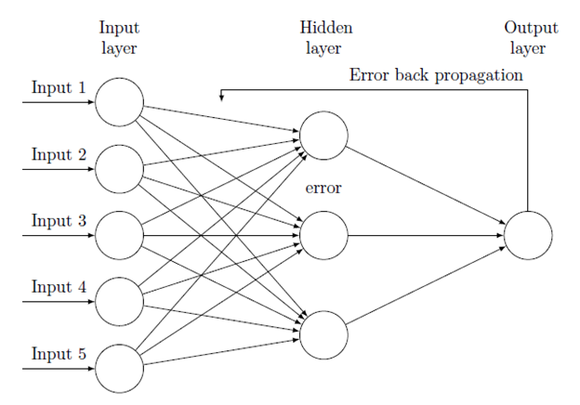

In [8]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/backpropagation.png')

In [11]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [12]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [13]:
print(a.data)
print(a.grad) # grad는 미분한 값 -> data가 거쳐온 layer에 대한 미분값이 축적되는 것
print(a.grad_fn) # 미분값을 계산한 함수에 대한 정보

tensor([[1., 1.],
        [1., 1.]])
None
None


In [14]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [15]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [16]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


# 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [17]:
from torch.utils.data import Dataset, DataLoader

In [18]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [19]:
mnist_transform = transforms.Compose([transforms.ToTensor(), # 이미지를 Tensor로 가져옴
                                       transforms.Normalize(mean=(0.5,), std=(1.0,))]) # 정규화 해서 가져옴

In [20]:
trainset = datasets.MNIST(root = '/content', # 현재 colab root명
                          train=True, download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                         train=False, download=True,  # testset에서는 train False로 지정
                         transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [26]:
!ls

drive  MNIST  sample_data


In [21]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [22]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2) # num_workers은 학습 도중 CPU의 작업을 몇 개의 코어를 사용해서 진행할지에 대한 설정 

In [23]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

 - 28(width) x 28(height) 1은(channel, 흑백)  8장
 - torch.Size[8]은 label

In [24]:
torch_image = torch.squeeze(images[0]) # 축소 
torch_image.shape

torch.Size([28, 28])

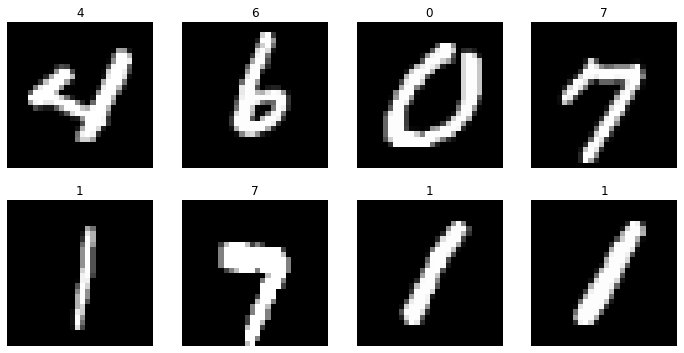

In [25]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()